# 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해서 분류를 수행함 


로지스틱 회귀가 선형 회귀와 다른 점
- 학습을 통해 선형 함수의 회귀선을 찾는 것이 아니라
- 시그모이드(Sigmoid) 함수의 최적선을 찾고
- 이 시그모이드 함수의 반환값을 확률로 간주해
- 확률에 따라 분류를 결정한다는 것 

In [ ]:
시그모이드 함수
- S자 커브 형태
- X값이 +, -로 아무리 커지거나 작아져도 
- Y값은 항상 0과 1 사이의 값을 반환함
- X값이 커지면 1에 근사하고
- X값이 작아지면 0에 근사함
- X가 0일 때는 0.5에 해당됨
- 실제 많은 자연, 사회 현상에서 
- 특정 변수의 확률값은 선형이 아니라 S자 커브 형태 가짐


In [ ]:
# 그림34 선형 함수 vs 시그모이드 함수

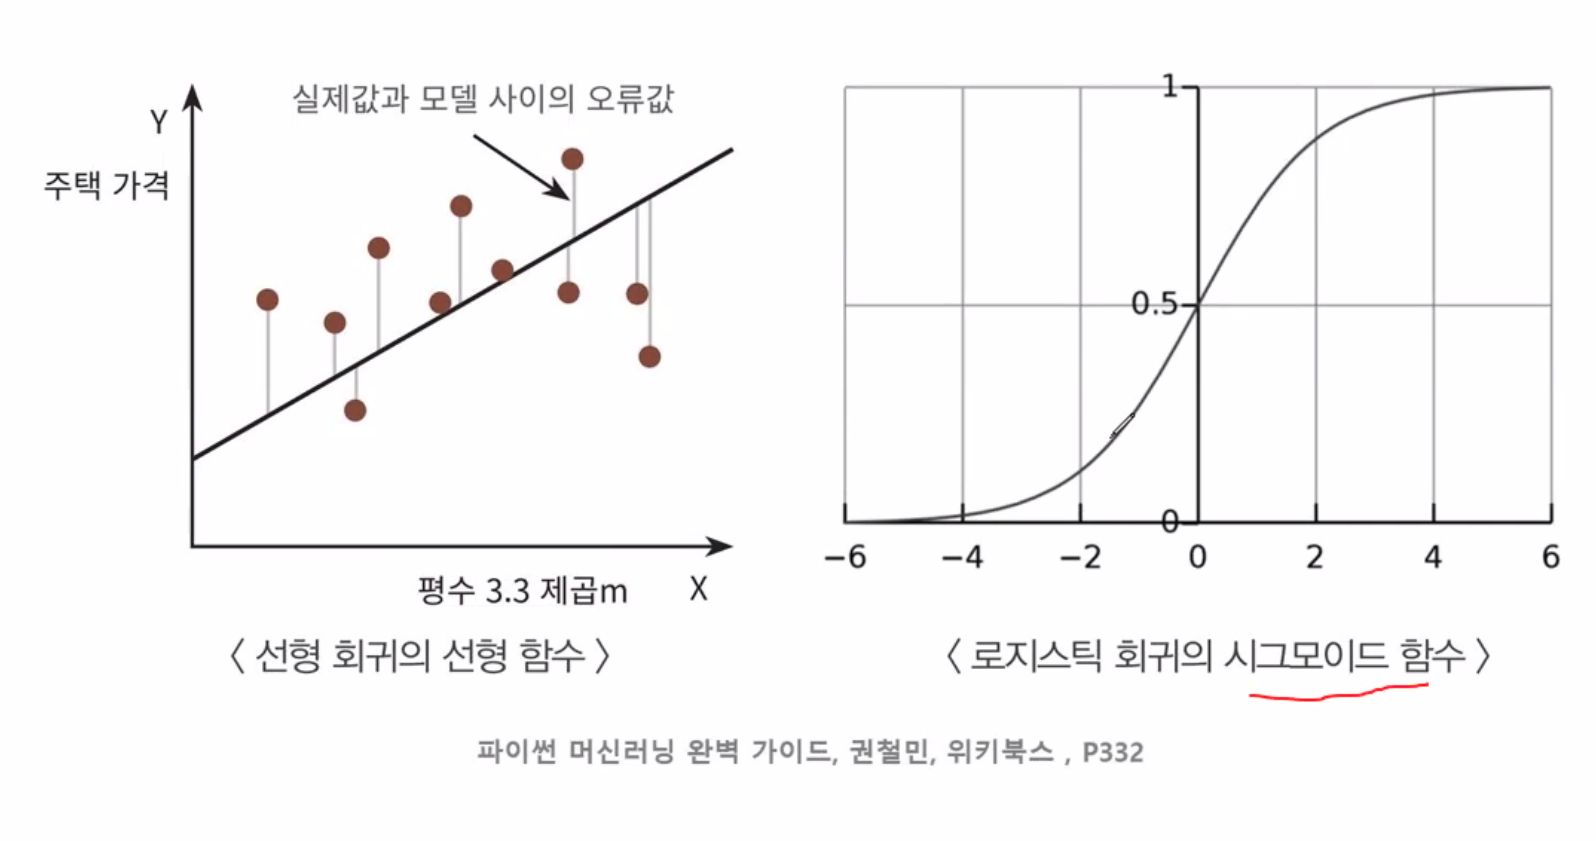

In [ ]:
회귀 문제를 분류 문제에 적용 
- 지금까지는 부동산 가격 같은 연속형 값을 구하는 데 회귀 사용
- 이번에는 회귀 문제를 분류 문제에 적용

예:
- 종양의 크기에 따라 악성 종양인지(Yes=1) 그렇지 않은지(No=0)를
- 회귀를 이용해 1과 0의 값으로 예측

In [ ]:
#그림35 시그모이드

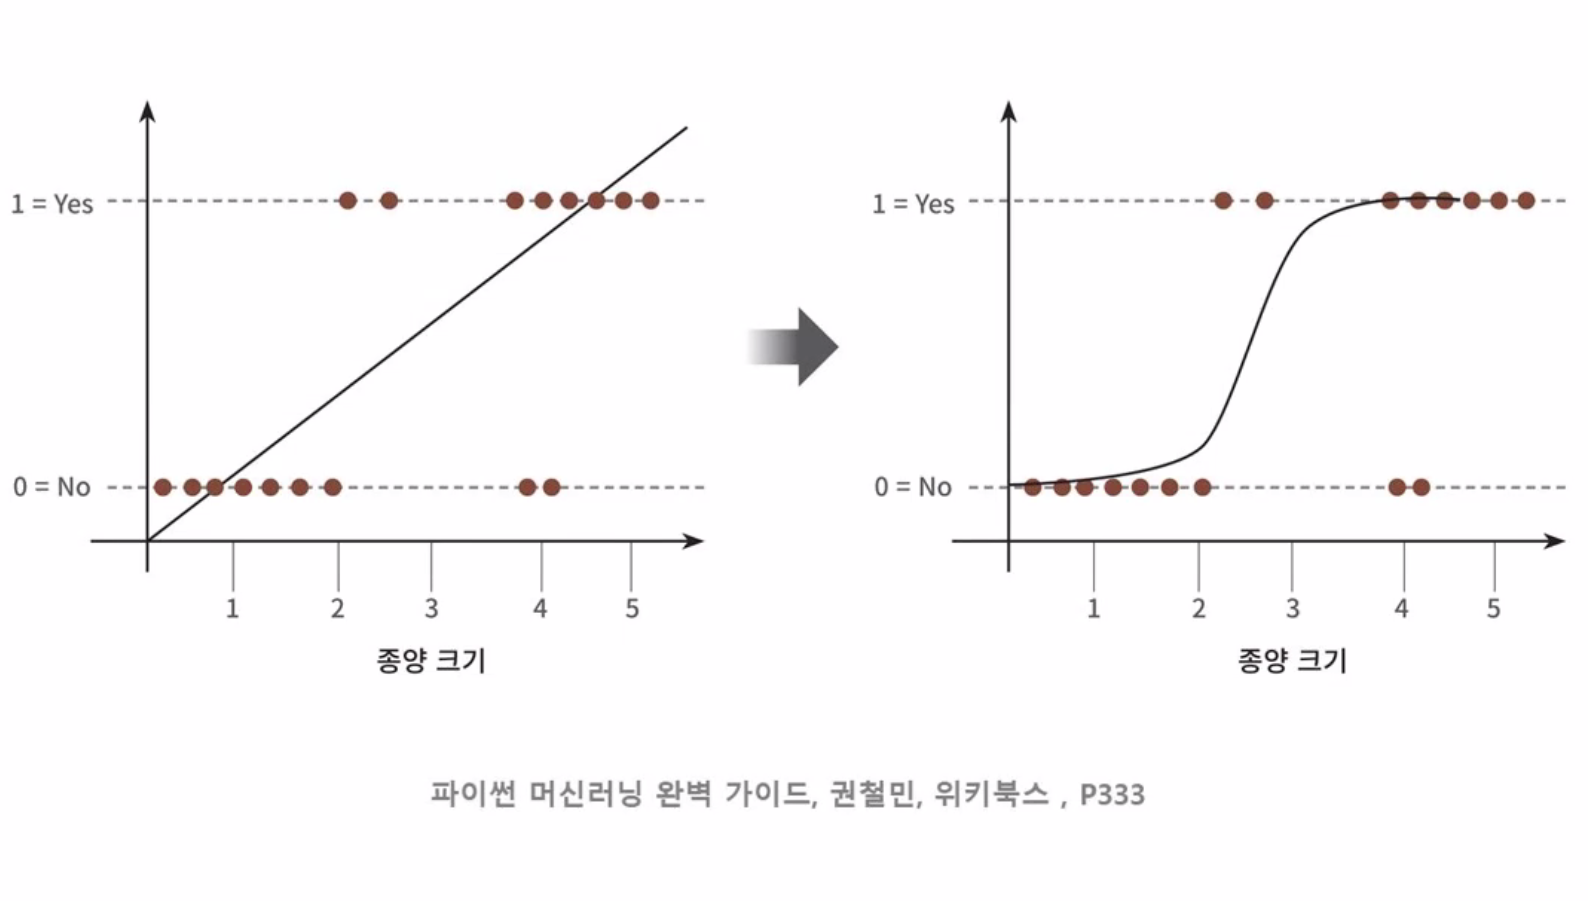

종양 크기에 따라 악성이 될 확률이 높다고 가정
- X축 : 종양 크기
- Y축 : 종양 여부 


왼쪽 그래프는 
- 회귀 적용 : 데이터가 모여 있는 곳으로 회귀 선을 그릴 수 있지만
- 회귀 선은 0과 1을 제대로 분류하지 못함
- 선형 회귀가 분류를 못하는 것은 아니지만 정확도가 떨어짐

오른쪽 그래프는
- S자 커브 형태의 시그모이드 함수 이용
- 좀 더 정확하게 0과 1에 대해서 분류 가능
- 로지스틱 회귀 방법 
- 선형 회귀 방식을 기반으로 하되 시그모이드 함수를 이용해서 분류를 수행하는 회귀



### 로지스틱 회귀 예제

In [ ]:
#위스콘신 유방암 데이터 세트를 이용해서 로지스틱 회귀로 암 여부 판단

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [5]:
# 데이터 로드
cancer=load_breast_cancer()

In [9]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
# 선형 회귀 계열의 로지스틱 회귀는 
# 데이터의 정규 분포도에 따라서 
# 예측 성능 영향을 받을 수 있으므로
# 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 
# 학습/테스트 데이터 세트 분리

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 스케일링 : 평균이 0, 분산이 1 인 데이터 분포로 변환 
scaler = StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [15]:
X_train , X_test , y_train , y_test = train_test_split(data_scaled , cancer.target,test_size=0.3, random_state=0)

In [ ]:
학습->예측->정확도출력해보기

In [16]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행 평가

from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf=LogisticRegression(solver='liblinear')
# solver ; 최적화 문제에 사용하는 알고리즘 

lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)

# 정확도accuracy
print('accuracy : {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc : {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))


accuracy : 0.982
roc_auc : 0.979


In [ ]:
버전 변경으로 solver='liblinear'가 디폴트 였는데 
버전이 변경되면서 solver='lbfgs'가 디폴트로 변경
solver='liblinear'를 적어줌

solver : weight 값을 최적화 유형을 구분하는 것 
    

하이퍼 파라미터 튜닝
- GridSearchCV를 이용해 하이퍼 파라미터 최적화

LogisticRegression 클래스가 주요 하이퍼 파라미터
- penalty : 규제 유형 설정 (11,12 규제) : 12가 기본
- C : 규제 강도를 조절하는 alpha 값의 역수
- C = 1/alpha
- C 값이 작을수록 규제 강도가 큼 

alpha : 학습 데이터 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
alpha 값이 커질수록 좋음

In [18]:
# 하이퍼 파라미터 설정 최적 평균 정확도 확인 

from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
params={
    'penalty' : ['l2','l1'],
    'C' : [0.01, 0.1, 1, 5, 10]
}

# GridSearchCV 이용해서 최적의 하이퍼 파라미터 활용
grid_clf = GridSearchCV(lr_clf, param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled, cancer.target)

print('최적 하이퍼 파라미터 : {0} ,최적 평균 정확도 : {1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'} ,최적 평균 정확도 : 0.979


In [ ]:
로지스틱 회귀 정리
- 가볍도 빠르면서도
- 이진 분류 예측 성능도 뛰어남
- 따라서 이진 분류기의 기본 모델로 사용하는 경우가 많음
- 또한 희소 행렬로 표현되는 텍스트 기반의 분류에서도 자주 사용됨 